## <span style="color:purple">Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from numpy import linalg
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

In [2]:
dataset = pd.read_csv('C:/Users/Satya/Documents/DataSets/abalone.data.txt', header=None)
dataset.columns = [ 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Rings']

## <span style="color:purple">Question 1a - Transform the first column ''Sex"  into a three column binary representation</span>

##### Using Label Encoder to convert from Text to Numbers

In [3]:

Labl_Enc = LabelEncoder()
gen_labels = Labl_Enc.fit_transform(dataset['Sex'])
dataset['Sex'] = gen_labels

##### Using One Hot Encoding to Convert into Binary Representation

In [4]:
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(dataset[['Sex']]).toarray().astype(int)
gen_feature_labels = list(Labl_Enc.classes_)
gen_features = pd.DataFrame(gen_feature_arr, 
                            columns=gen_feature_labels)

In [5]:
dataset = pd.concat([dataset, gen_features,], axis=1)
dataset = dataset.drop('Sex' , axis =1)
dataset.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [6]:
#Rearrange Columns to make the predictor Column as the last Variable
cols = dataset.columns.tolist()
cols =   cols[8:]+cols[0:7]+ cols[7:8]
ind_cols = cols[0:10]
dataset = dataset[cols]

## <span style="color:purple">Question 1b - Standardization the Independent variables

In [7]:
scaler = StandardScaler()
# Fit your data on the scaler object
scaled = scaler.fit_transform(dataset[ind_cols])
X = pd.DataFrame(scaled, columns=ind_cols)

In [8]:
Y = dataset['Rings']
X['intercept'] = 1 # Adding an Intercept

## <span style="color:purple">Question 1c -Implement Functions  for Ridge Regression

 ##### mylinridgereg(X, Y, L) --> calculates the linear least squares solution with the ridge regression penalty parameter

In [9]:
def mylinridgereg(x, y, L):
    x=np.matrix(x)
    y=np.matrix(y).transpose()
    XTX = x.transpose()*x
    XTY = x.transpose()*y
    LI = L*np.matrix(np.identity(len(XTX)))
    LI[0,0]=0
    weights = linalg.inv(XTX-LI)*XTY
    print ( "the weights are:" , weights )
    return weights

 ##### mylinridgeregeval(X, weights) --> returns a prediction of the target variable given the input variables and regression weights;

In [10]:
def mylinridgeregeval(x, weights):
    y = np.dot(x,weights)
    return y

##### meansquarederr(T, Tdash) --> computes the mean squared error between the predicted and actual target values.

In [11]:
def meansquarederr(T, Tdash):
    T=np.matrix(T).transpose()
    residuals = Tdash - T
    SSE = residuals.transpose()*residuals
    MSE = SSE/len(T)
    print ( "the mean squared error is:" , MSE )
    return MSE

# <span style="color:purple">Question 1d -Partition the dataset into 80% training and 20% testing

In [12]:
X_train , X_Test , y_train , y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 0 )

#### Predict target variable for both training and testing data.

In [13]:
#Prediction For Train Data
weights = mylinridgereg(X_train,y_train,1)
y_pred = mylinridgeregeval(X_train,weights) #Predicted Variable
MSE = meansquarederr(y_train, y_pred)

the weights are: [[ 0.16737152]
 [-0.21728251]
 [ 0.21065652]
 [-0.04556324]
 [ 1.12896936]
 [ 0.33828121]
 [ 4.80363486]
 [-4.57528618]
 [-1.21713646]
 [ 1.09170674]
 [ 9.92942531]]
the mean squared error is: [[4.75710205]]


In [14]:
#Prediction For Test Data
weights = mylinridgereg(X_train,y_train,1)
y_pred = mylinridgeregeval(X_Test,weights) #Predicted Variable
MSE = meansquarederr(y_test, y_pred)

the weights are: [[ 0.16737152]
 [-0.21728251]
 [ 0.21065652]
 [-0.04556324]
 [ 1.12896936]
 [ 0.33828121]
 [ 4.80363486]
 [-4.57528618]
 [-1.21713646]
 [ 1.09170674]
 [ 9.92942531]]
the mean squared error is: [[5.01037312]]


# <span style="color:purple">Question 1e Identify lamba with the best performance

In [15]:
%%capture
# Capturing MSE for Lambda values between 1-100
Lambda_Values = []
MSE_Values = []
for Lambda in np.linspace(0, 20, num=100):
    weights = mylinridgereg(X_train,y_train,Lambda)
    y_pred = mylinridgeregeval(X_Test,weights)
    MSE = meansquarederr(y_test, y_pred)
    Lambda_Values.append(Lambda)
    MSE_Values.append(MSE)

Text(0,0.5,'MSE')

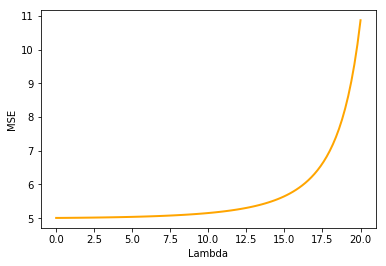

In [16]:
plotdata = pd.DataFrame({'Lambda': Lambda_Values, 'MSE': MSE_Values })
plt.plot( 'Lambda', 'MSE', data=plotdata, marker='', color='orange', linewidth=2)
plt.xlabel('Lambda')
plt.ylabel('MSE')

####  Based on the Above Curve it is quite evident Lambda values must be on the lower side for best performance . Typically the Value should be between 0 to 10

#### Which are the most significant attributes?

In [17]:
#Prediction For Test Data
weights = mylinridgereg(X_train,y_train,1)
y_pred = mylinridgeregeval(X_Test,weights)
MSE = meansquarederr(y_test, y_pred)

the weights are: [[ 0.16737152]
 [-0.21728251]
 [ 0.21065652]
 [-0.04556324]
 [ 1.12896936]
 [ 0.33828121]
 [ 4.80363486]
 [-4.57528618]
 [-1.21713646]
 [ 1.09170674]
 [ 9.92942531]]
the mean squared error is: [[5.01037312]]


#### Based on the coefficient Values we are dropping the below features. 

In [18]:
New_X = X.copy()
New_X.drop(['F', 'I', 'M', 'Length' , 'Diameter' , 'Viscera weight'] , axis = 1, inplace = True)

In [19]:
X_train , X_Test , y_train , y_test = train_test_split(New_X,Y,test_size = 0.2 , random_state = 0 )
#Prediction For Test Data
weights = mylinridgereg(X_train,y_train,1)
y_pred = mylinridgeregeval(X_Test,weights)
MSE = meansquarederr(y_test, y_pred)

the weights are: [[ 0.56243629]
 [ 3.53536713]
 [-4.10020943]
 [ 1.78740554]
 [ 9.93051308]]
the mean squared error is: [[5.26056529]]


### But surprisingly there have not been any improvement in MSE Values.  But also the difference is not huge. So if we need a simple model we may even stick with this

## <span style="color:purple">  Creating a Function for Question  1(f) , 1(g), 1(h) . 
##### <span style="color:purple"> The Function Will Return the Below

##### <span style="color:purple">  a) A List of Mean Squared Error ( Test Set ) for one Fraction for a set of Lamba Values
##### <span style="color:purple">  b) A List of Mean Squared Error ( Train Set ) for one Fraction for a set of Lamba Values
##### <span style="color:purple">  c) A List of of Lamba Values the same Fraction


In [20]:
def MSE_calc ( Fraction_Size , X , Y ) : 
    Lambda_Values = []
    MSE_Test_Values = []
    MSE_Train_Values = []
    MSE_Test_itr_Values = []
    MSE_Train_itr_Values = []
    for Lambda in np.linspace(0, 10, num=20):
        for i in np.linspace(1, 25, num=25):
            X_train , X_Test , y_train , y_test = train_test_split(X,Y,test_size = Fraction_Size , random_state = None )
            weights = mylinridgereg(X_train,y_train,Lambda)
            y_pred_test = mylinridgeregeval(X_Test,weights)
            y_pred_train = mylinridgeregeval(X_train,weights)
            MSE_Test = meansquarederr(y_test, y_pred_test)
            MSE_Train = meansquarederr(y_train, y_pred_train)
            MSE_Test_itr_Values.append(MSE_Test)
            MSE_Train_itr_Values.append(MSE_Train)
        MSE_Test_itr = np.mean(MSE_Test_itr_Values)
        MSE_Train_itr = np.mean(MSE_Train_itr_Values)
        Lambda_Values.append(Lambda)
        MSE_Test_Values.append(MSE_Test_itr)
        MSE_Train_Values.append(MSE_Train_itr)
    return Lambda_Values , MSE_Test_Values , MSE_Train_Values

In [21]:
Min_MSE = []
Fraction_Size  = []
Min_Lambda= []

In [24]:
%%capture
Lambda_Values , MSE_Test_Values , MSE_Train_Values = MSE_calc ( .1 , X , Y)
Min_MSE.append(np.min(MSE_Test_Values))
Fraction_Size.append(.1)
Min_Lambda.append(Lambda_Values[list(MSE_Test_Values).index(np.min(MSE_Test_Values))])

#### Figure 1 for with lambda  on the x-axis, and MSE on the y-axis.

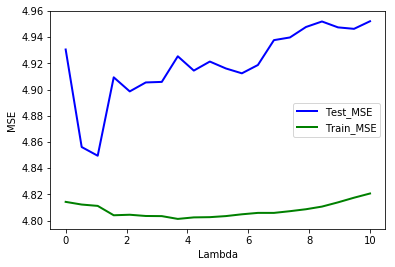

In [25]:
Test_vs_Train=pd.DataFrame({'Lambda': Lambda_Values, 'Test_MSE': MSE_Test_Values, 'Train_MSE': MSE_Train_Values })
plt.plot( 'Lambda', 'Test_MSE', data=Test_vs_Train, marker='', color='blue', linewidth=2)
plt.plot( 'Lambda', 'Train_MSE', data=Test_vs_Train, marker='', color='green', linewidth=2)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()

In [26]:
%%capture
Lambda_Values , MSE_Test_Values , MSE_Train_Values = MSE_calc ( .15 , X , Y)
Min_MSE.append(np.min(MSE_Test_Values))
Fraction_Size.append(.15)
Min_Lambda.append(Lambda_Values[list(MSE_Test_Values).index(np.min(MSE_Test_Values))])

#### Figure 2 for with lambda  on the x-axis, and MSE on the y-axis.

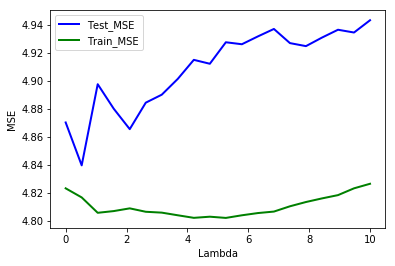

In [27]:
Test_vs_Train=pd.DataFrame({'Lambda': Lambda_Values, 'Test_MSE': MSE_Test_Values, 'Train_MSE': MSE_Train_Values })
plt.plot( 'Lambda', 'Test_MSE', data=Test_vs_Train, marker='', color='blue', linewidth=2)
plt.plot( 'Lambda', 'Train_MSE', data=Test_vs_Train, marker='', color='green', linewidth=2)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()

In [28]:
%%capture
Lambda_Values , MSE_Test_Values , MSE_Train_Values = MSE_calc ( .2 , X , Y)
Min_MSE.append(np.min(MSE_Test_Values))
Fraction_Size.append(.2)
Min_Lambda.append(Lambda_Values[list(MSE_Test_Values).index(np.min(MSE_Test_Values))])

####  Figure 3 for with lambda  on the x-axis, and MSE on the y-axis.

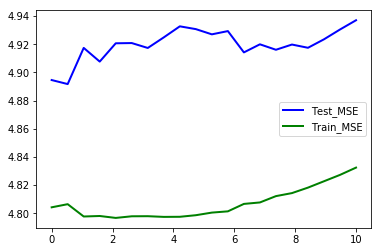

In [29]:
Test_vs_Train=pd.DataFrame({'Lambda': Lambda_Values, 'Test_MSE': MSE_Test_Values, 'Train_MSE': MSE_Train_Values })
plt.plot( 'Lambda', 'Test_MSE', data=Test_vs_Train, marker='', color='blue', linewidth=2)
plt.plot( 'Lambda', 'Train_MSE', data=Test_vs_Train, marker='', color='green', linewidth=2)
plt.legend()

In [30]:
%%capture
Lambda_Values , MSE_Test_Values , MSE_Train_Values = MSE_calc ( .25 , X , Y)
Min_MSE.append(np.min(MSE_Test_Values))
Fraction_Size.append(.25)
Min_Lambda.append(Lambda_Values[list(MSE_Test_Values).index(np.min(MSE_Test_Values))])

####  Figure 4 for with lambda  on the x-axis, and MSE on the y-axis.

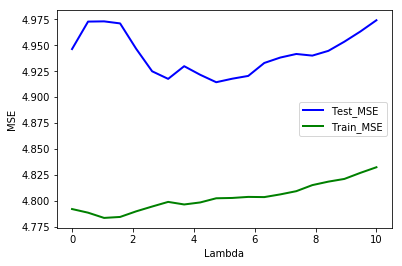

In [31]:
Test_vs_Train=pd.DataFrame({'Lambda': Lambda_Values, 'Test_MSE': MSE_Test_Values, 'Train_MSE': MSE_Train_Values })
plt.plot( 'Lambda', 'Test_MSE', data=Test_vs_Train, marker='', color='blue', linewidth=2)
plt.plot( 'Lambda', 'Train_MSE', data=Test_vs_Train, marker='', color='green', linewidth=2)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()

In [32]:
%%capture
Lambda_Values , MSE_Test_Values , MSE_Train_Values = MSE_calc ( .3 , X , Y)
Min_MSE.append(np.min(MSE_Test_Values))
Fraction_Size.append(.3)
Min_Lambda.append(Lambda_Values[list(MSE_Test_Values).index(np.min(MSE_Test_Values))])

#### Figure 5 for with lambda  on the x-axis, and MSE on the y-axis.

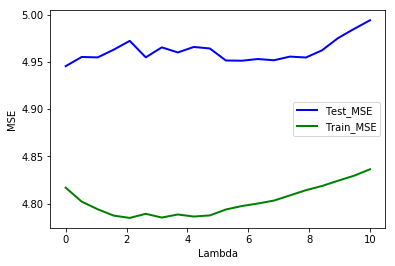

In [33]:
Test_vs_Train=pd.DataFrame({'Lambda': Lambda_Values, 'Test_MSE': MSE_Test_Values, 'Train_MSE': MSE_Train_Values })
plt.plot( 'Lambda', 'Test_MSE', data=Test_vs_Train, marker='', color='blue', linewidth=2)
plt.plot( 'Lambda', 'Train_MSE', data=Test_vs_Train, marker='', color='green', linewidth=2)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()

#### The Above Figures gives the Following Clarity
####  -> Generally The Train MSE is always less than Test MSE
#### -> As we increase lambda Values both Train and Test MSE increases . As we increase it more the rate of increase in MSE also increases

#### Plot of minimum average mean squared testing error versus the partition fraction values.

Text(0,0.5,'Min_MSE')

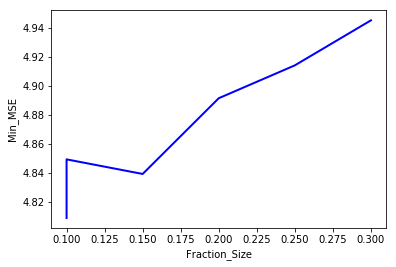

In [34]:
plotdata = pd.DataFrame({'Fraction_Size': Fraction_Size, 'Min_MSE': Min_MSE })
plt.plot( 'Fraction_Size', 'Min_MSE', data=plotdata, marker='', color='blue', linewidth=2)
plt.xlabel('Fraction_Size') 
plt.ylabel('Min_MSE') 

#### plot of Lambda  value that produced the minimum average mean squared testing error versus the partition fraction.

Text(0,0.5,'Min_Lambda')

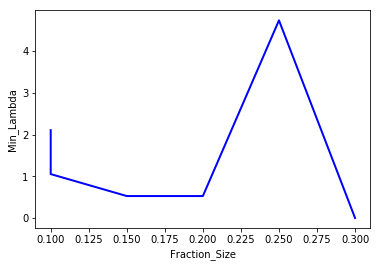

In [35]:
plotdata = pd.DataFrame({'Fraction_Size': Fraction_Size, 'Min_Lambda': Min_Lambda })
plt.plot( 'Fraction_Size', 'Min_Lambda', data=plotdata, marker='', color='blue', linewidth=2)
plt.xlabel('Fraction_Size') 
plt.ylabel('Min_Lambda') 

In [36]:
X_train , X_Test , y_train , y_test = train_test_split(X,Y,test_size = .2 , random_state = None )
weights = mylinridgereg(X_train,y_train,0)
y_pred_test = mylinridgeregeval(X_Test,weights)
y_pred_train = mylinridgeregeval(X_train,weights)

the weights are: [[ 0.1875    ]
 [-0.1875    ]
 [ 0.1875    ]
 [-0.0286486 ]
 [ 0.89046922]
 [ 0.79679492]
 [ 4.22949828]
 [-4.26403433]
 [-1.25401391]
 [ 1.24652458]
 [ 9.92100331]]


#### Plot of predicted versus actual values for Test Data

Text(0,0.5,'Predicated_Value')

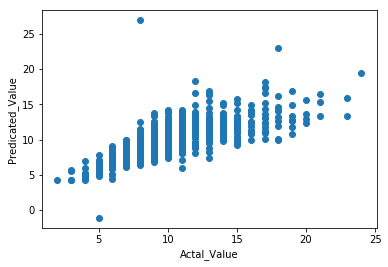

In [37]:
plt.scatter(pd.DataFrame(np.matrix(y_test).transpose())[0], pd.DataFrame(y_pred_test)[0])
plt.xlabel('Actal_Value') 
plt.ylabel('Predicated_Value') 

#### Plot of predicted versus actual values for Train Data

Text(0,0.5,'Predicated_Value')

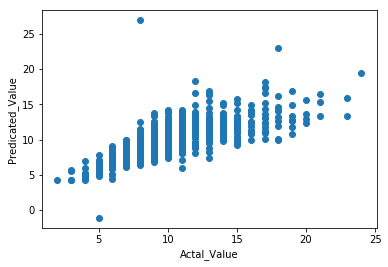

In [38]:
plt.scatter(pd.DataFrame(np.matrix(y_test).transpose())[0],pd.DataFrame(y_pred_test)[0])
plt.xlabel('Actal_Value') 
plt.ylabel('Predicated_Value') 

#### As Mentioned in the Question the Above 2 should give us Straight Line , But We do have a slightly different figures. If we look closely the scatter plot does resemble close to a 45-degree line through the plot. 